In [1]:
import pandas
import matplotlib.pyplot
import seaborn
import pulp

import espn_fantasy_rugby.team_selector
import espn_fantasy_rugby.points_predictor
import espn_fantasy_rugby.io

In [2]:
features = ['OPP', 'POS', 'SM']
target = 'MDP'

espn_data = espn_fantasy_rugby.io.read_espn_data('../data/espn_rugby_data.xlsx')

manager_data = pandas.read_csv('../data/manager_round_points.csv')
manager_data['TOTAL_POINTS'] = manager_data.groupby('MANAGER')['POINTS'].cumsum()

In [3]:
first_round_players = [
    'T Furlong',
    'R Best',
    'J George',
    'P Willemse',
    'M Itoje',
    'A Steyn',
    'J Tipuric',
    'B Vunipola',
    'C Murray',
    'J Sexton',
    'J Adams',
    'J Davies',
    'D Penaud',
    'S Hogg',
    'B Kinghorn'
]

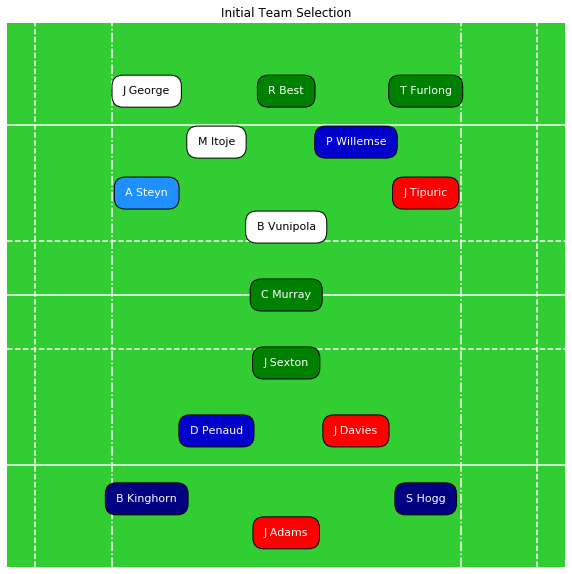

In [4]:
initial_team = espn_fantasy_rugby.team_selector.get_initial_team(first_round_players, espn_data)

fig, ax = matplotlib.pyplot.subplots(figsize=(10,10))
espn_fantasy_rugby.team_selector.show_team(initial_team, ax)
ax.set_title('Initial Team Selection')
matplotlib.pyplot.show()

In [5]:
team_each_round = espn_fantasy_rugby.team_selector.simulate_tournament(espn_data, initial_team, features, target)

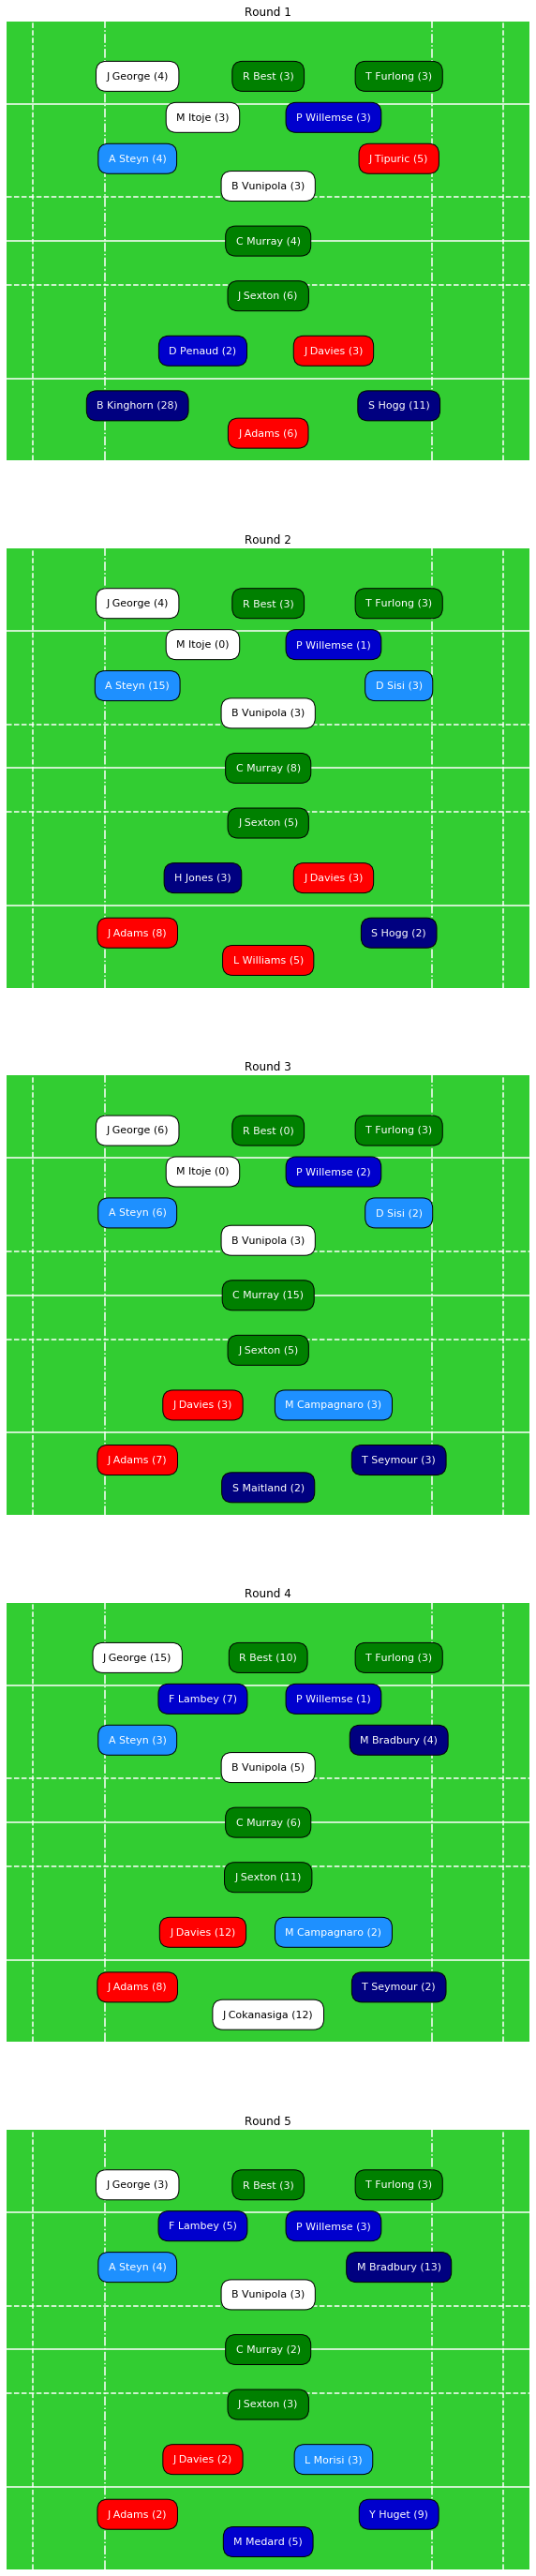

In [6]:
fig, ax = matplotlib.pyplot.subplots(figsize=(10,50), nrows=5, ncols=1)
for tournament_round in [1,2,3,4,5]:
    team_round = team_each_round[team_each_round['ROUND']==tournament_round]
    espn_fantasy_rugby.team_selector.show_team(team_round, ax[tournament_round-1])
    ax[tournament_round-1].set_title('Round {}'.format(tournament_round))
matplotlib.pyplot.show()

## How does the algorithm compare to other managers?

In [7]:
algorithm_results = pandas.DataFrame(
    team_each_round.groupby('ROUND')['MDP'].sum()
).reset_index()

algorithm_results['TOTAL_POINTS'] = algorithm_results['MDP'].cumsum()
algorithm_results

,ROUND,MDP,TOTAL_POINTS
0,1,88,88
1,2,66,154
2,3,60,214
3,4,101,315
4,5,63,378


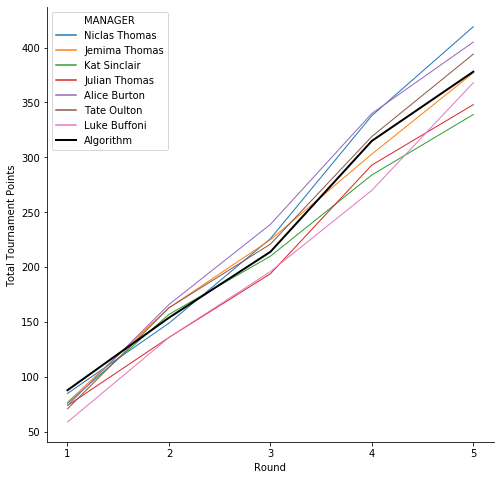

In [8]:
fig, ax = matplotlib.pyplot.subplots(figsize=(8,8))
seaborn.lineplot(
    data=manager_data,
    x='ROUND',
    y='TOTAL_POINTS',
    hue='MANAGER',
    **{
        'linewidth':1
    }
)
seaborn.lineplot(
    data=algorithm_results,
    x='ROUND',
    y='TOTAL_POINTS',
    **{
        'linewidth':2,
        'label':'Algorithm',
        'color':'black'
    }
)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('Round')
ax.set_ylabel('Total Tournament Points ')
ax.legend()
seaborn.despine()
matplotlib.pyplot.show()